<a href="https://colab.research.google.com/github/Sameekshaurs/ML_lab/blob/main/day_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(20, 80, 200),
    'BMI': np.random.uniform(18, 40, 200),
    'BloodPressure': np.random.randint(60, 120, 200),
    'Glucose': np.random.randint(70, 200, 200),
    'Insulin': np.random.randint(0, 300, 200),
    'Outcome': np.random.binomial(1, 0.3, 200)  # 30% chance of 1 (disease)
})

# Save to CSV
data.to_csv("simple_medical_data.csv", index=False)
print("Dataset created and saved as simple_medical_data.csv")
print(data.head())


Dataset created and saved as simple_medical_data.csv
   Age        BMI  BloodPressure  Glucose  Insulin  Outcome
0   58  31.175040             78      122      153        0
1   71  33.285269             87      126       13        0
2   48  37.370292            117      108      186        0
3   34  31.735789            114      178        6        1
4   62  24.503941             85      111        2        1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the dataset
data = pd.read_csv("simple_medical_data.csv")
print(data.head())

   Age        BMI  BloodPressure  Glucose  Insulin  Outcome
0   58  31.175040             78      122      153        0
1   71  33.285269             87      126       13        0
2   48  37.370292            117      108      186        0
3   34  31.735789            114      178        6        1
4   62  24.503941             85      111        2        1


In [5]:
# Split into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7750


In [7]:
# Define cost matrix
cost_matrix = {
    'True Positive': 0,
    'False Positive': 5,
    'True Negative': 0,
    'False Negative': 10
}

# Calculate expected cost
expected_cost = 0
for actual, predicted in zip(y_test, y_pred):
    if actual == 1 and predicted == 1:
        expected_cost += cost_matrix['True Positive']
    elif actual == 1 and predicted == 0:
        expected_cost += cost_matrix['False Negative']
    elif actual == 0 and predicted == 1:
        expected_cost += cost_matrix['False Positive']
    elif actual == 0 and predicted == 0:
        expected_cost += cost_matrix['True Negative']

average_expected_cost = expected_cost / len(y_test)
print(f"Average Expected Cost: {average_expected_cost:.4f}")


Average Expected Cost: 2.2500


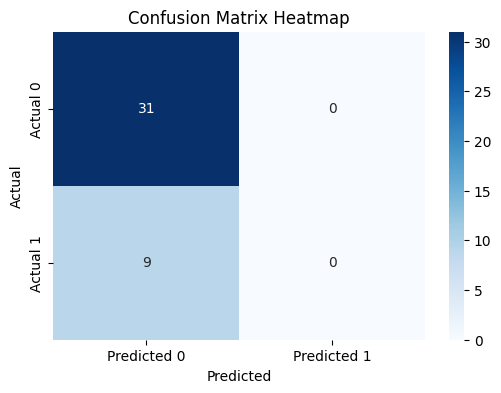

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
